# Generative deep learning

人工智能模拟人类思维过程的潜力超越了物体识别等被动任务。它很好地扩展到创造性活动。当我第一次声称， 在不久的将来，我们消费的大多数文化内容将在人工智能的大力帮助下创建时，我遇到了怀疑，甚至有些来自长期机器学习从业者。那是在2014年。快进几年，怀疑以令人难以置信的速度消退了。2015年夏天，谷歌的DeepDream算法让我们很开心，将图像变成了 psychedelic mess of dog eyes 和pareidolic artifacts；2016年，我们开始使用智能手机应用程序将照片转换为各种风格的绘画。2016年夏天，一部实验性短片《Sunspring》使用长短期记忆网络写的剧本执导。也许你最近听过由神经网络临时生成的音乐。

诚然，到目前为止，我们从人工智能中看到的艺术作品质量相当低。AI不能与人类编剧、画家和作曲家相媲美。但取代人类总是无关紧要：人工智能不是用其他东西取代我们自己的智力，而是将更多的智能带入我们的生活和工作——不同类型的智能。在许多领域，特别是在创意领域，人工智能将被人类用作增强自身能力的工具：`augmented intelligence than artificial intelligence`。

艺术创作的很大一部分包括简单的模式识别和技术技能。这正是许多人认为不那么有吸引力甚至可无可无的部分。这就是人工智能发挥作用的地方。我们的感知模式、语言和艺术品都有统计结构。学习这种结构是深度学习算法擅长的。机器学习模型可以学习图像、音乐和故事的统计潜空间，然后他们可以从这个空间进行采样，创造新的艺术作品，其特征与模型在训练数据中看到的相似。当然，这种采样本身并不是艺术创作的行为。这仅仅是一个数学运算。只有我们作为人类观众的解释才能赋予模型所产生的意义。但在熟练的艺术家手中，算法可以变得有意义和美丽。潜空间采样可以成为一把画笔，赋予艺术家能力，增强我们的创作力舞蹈，并扩大我们可以想象的空间。此外，它可以通过消除对技术技能和实践技巧的需求来使艺术创作更容易获得——建立一种新的纯粹表达媒介，将艺术与工艺分开。

Iannis Xenakis是电子和算法音乐的有远见的先驱，在20世纪60年代，在自动通信技术应用于音乐作曲的背景下，他充分表达了同样的想法：

`从乏味的计算中解脱出来，作曲家能够专注于新音乐形式带来的一般问题，并探索这种形式的角落和缝隙，同时修改输入数据的值。例如，他可以测试从独奏者到室内乐团再到大型管弦乐队的所有乐器组合。在电子计算机的帮助下，作曲家成为一种飞行员：他按下按钮，引入坐标，并监督宇宙飞船在声音空间航行的控制，穿越他以前只能作为遥远的梦想才能看到的声音星座和星系。`

在本章中，我们将从各个角度探索深度学习在增强艺术创作方面的潜力。我们将会回顾序列数据生成(其可以用来生成文本或音乐)， DeepDream，以及使用各种自动编码器和生成对抗网络生成的图像生成。我们将让您的计算机幻想前所未有的内容；也许我们也会让您幻想在技术和艺术交汇处的奇妙可能性。让我们开始吧。

## 12.1 Text generation

在本节中，我们将探索如何使用循环神经网络生成序列数据。我们将使用文本生成作为示例，但完全相同的技术可以推广到任何类型的序列数据：您可以将其应用于音符序列以生成新音乐，将其应用于笔触数据的时间序列（可能是艺术家在iPad上绘画时录制的），以生成笔画，等等。

序列数据生成绝不限于艺术内容生成。它已成功应用于语音合成和聊天机器人的对话生成。谷歌于2016年发布的Smart Reply feature，能够自动生成对电子邮件或短信的快速回复，由类似技术提供支持。

### 12.1.1 A brief history of generative deep learning for sequence generation

2014年底，很少有人见过首字母缩写LSTM，即使在机器学习社区也是如此。序列数据生成与循环网络的成功应用直到2016年才开始出现在主流。但这些技术有相当长的历史，从1997年LSTM算法的开发开始（在第10章中讨论）。这种新算法很早就被用来按字符生成文本字符。

2002年，当时在瑞士Schmidhuber实验室的Douglas Eck首次将LSTM应用于音乐生成，并取得了有希望的结果。Eck现在是Google Brain的研究员，2016年，他在那里成立了一个名为Magenta的新研究小组，专注于应用现代深度学习技术来制作引人入胜的音乐。

在21世纪初和2010年代初，Alex Graves在使用循环网络生成序列数据方面做了重要的开创性工作。特别是，他2013年关于应用recurrent mixture density networks 使用钢笔位置的时间序列生成类似人类的笔迹的工作被一些人视为一个转折点。在那个特定时间时刻，神经网络的这种特定应用为我捕捉到了梦想的机器的概念，也是我开始开发Keras时的重要灵感。

Graves在上传到arXiv的2013年LaTeX文件中留下了类似的注释：“Generating sequential data is the closest computers get to dreaming.” 几年后，我们认为许多这些进展是理所当然的，但当时很难观看Graves的展示，也很难不受可能性的敬畏。2015年至2017年间，神经网络经常性成功用于文本和对话生成、音乐生成和语音合成。

然后在2017-2018年左右，Transformer架构开始接管循环神经网络，不仅用于监督的自然语言处理任务，也用于生成序列模型——特别是语言建模（word-level text generation）。生成 Transforme人 最著名的例子是GPT-3，这是一个由初创公司OpenAI 在惊人的大型文本语料库上训练的1750亿参数文本生成模型，包括大多数数字书籍、维基百科和整个互联网的大部分爬虫。GPT-3 在2020年成为头条新闻，因为它能够就几乎任何主题生成听起来合理的文本段落。

### 12.1.2 How do you generate sequence data?

在深度学习中生成序列数据的通用方法是训练模型（通常是 Transformer 或 RNN）使用之前的 token 作为输入来预测序列中的下一个 token 或 下几个 token。例如，给定输入“the cat is on the”，模型被训练来预测目标“mat”，即下一个单词。像往常一样，在处理文本数据时，token 通常是单词或字符，任何可以根据之前的 token 建模下一个 token 概率的网络都称为语言模型。语言模型捕获了语言的潜空间：其统计结构。

一旦您有了这样一个训练有素的语言模型，您可以从中进行采样（生成新序列）：您向其提供初始文本字符串（称为条件数据），要求它生成下一个字符或下一个单词（您甚至可以一次生成几个 token），将生成的输出重新添加到输入数据中，并多次重复该过程（见图12.1）。此循环允许您生成任意长度的序列，以反映模型所受训练的数据结构：看起来几乎像人类写句子的序列。

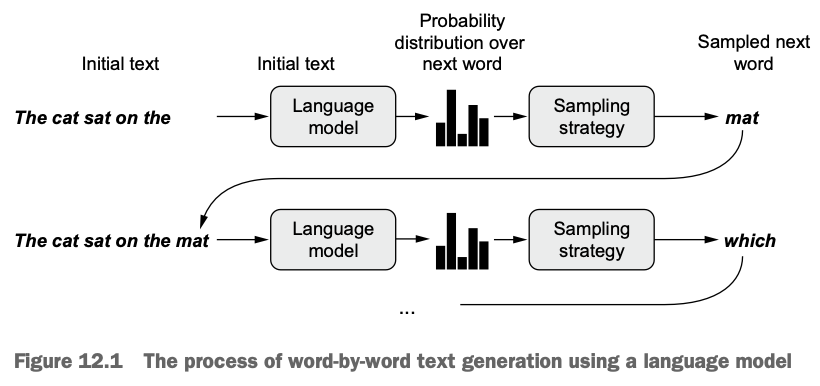

### 12.1.3 The importance of the sampling strategy

在生成文本时，您选择下一个 token 的方式至关重要。一种朴素的方法是贪婪采样，包括总是选择最有可能的下一个token。但这种方法会导致重复的、可预测的字符串，这些字符串看起来不像连贯的语言。一种更有趣的方法可以做出稍微多一点的引人选择：它通过从下一个字符的概率分布中采样来引入采样过程的随机性。这被称为随机采样。在这样的设置中，如果一个单词的概率为0.3，根据模型成为句子的下一个，您将在30%的时间中选择它。请注意，贪婪的采样也可以表示为为从概率分布中采样：某个单词的概率为1，其他的概率为0。

概率地从模型的softmax输出中采样是正确的：它允许在一段时间内对甚至不太可能的单词进行采样，生成看起来更有趣的句子，有时通过想出训练数据中没有出现的新的、听起来逼真的句子来展示创造力。但这种策略有一个问题：它不能提供一种方法来控制采样过程中的随机性。

你为什么想要或多或少的随机性？考虑一个极端情况：纯随机抽样，从均匀的概率分布中绘制下一个单词，每个单词都同样可能。该方案具有最大的随机性；换句话说，这种概率分布具有最大的熵。当然，它不会产生任何有趣的东西。在另一个极端，贪婪的采样也不会产生任何有趣的东西，也没有随机性：相应的概率分布具有最小的熵。从“真实”概率分布（模型的softmax函数输出的分布）采样构成了这两个极端之间的中间点。但您可能还想探索许多其他中间点。更少的熵将使生成的序列具有更可预测的结构（因此它们看起来更逼真），而更多的熵将导致更令人惊讶和创造性的序列。从生成模型中采样时，在生成过程中探索不同数量的随机性总是好的。因为我们人类是生成数据有多有趣的最终判断者，所以有趣性是高度主观的，并且无法提前知道最佳熵点在哪里。

为了控制采样过程中的随机性，我们将引入一个称为 `softmax temperature` 的参数，该参数描述了用于采样的概率分布的熵：它描述了下一个单词的选择是多么令人惊讶或可预测。给定温度值，通过以下方式重新加权，从模型的 softmax 输出的概率分布计算新的概率分布。

In [1]:
import numpy as np

def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

更高的温度会导致更高的熵的采样分布，这将生成更令人惊讶和非结构化生成的数据，而较低的温度将导致更少的随机性和更可预测的生成数据（见图12.2）。

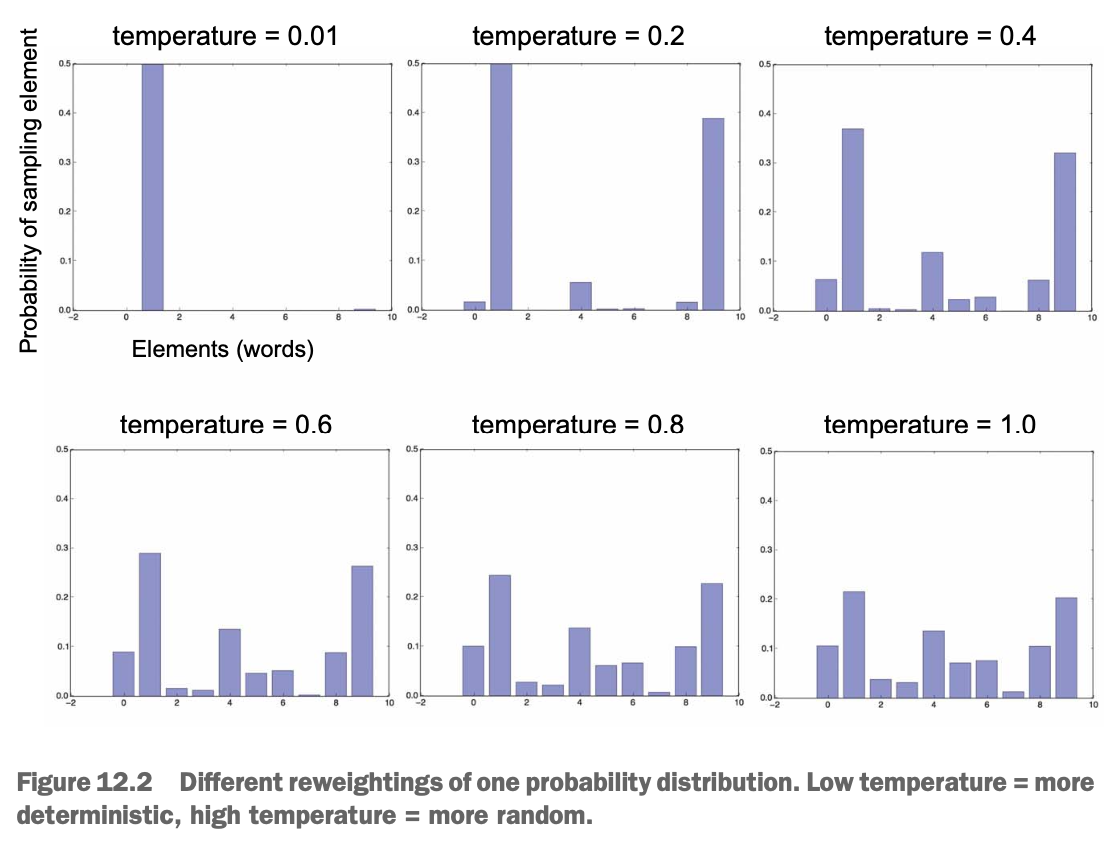

### 12.1.4 Implementing text generation with Keras

让我们在Keras实现中将这些想法付诸实践。您首先需要的是许多文本数据，您可以使用这些数据来学习语言模型。您可以使用任何足够大的文本文件或一组文本文件——维基百科、指环王等。

在本例中，我们将继续使用IMDB上一章的电影评论数据集，我们将学习生成从未读过的电影评论。因此，我们的语言模型将是这些电影评论的风格和主题的模型，而不是英语的一般模型。

就像上一章一样，让我们下载并解压缩IMDB电影评论数据集。

```
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
```

您已经熟悉了数据的结构：我们得到了一个名为aclImdb的文件夹，其中包含两个子文件夹，一个用于负面情绪电影评论，另一个用于积极情绪评论。每个评论都有一个文本文件。我们将使用 `label_mode=None` 调用 `text_dataset_ from_directory`，以创建一个从这些文件读取的数据集，并生成每个文件的文本内容。

In [2]:
import tensorflow as tf
from tensorflow import keras

dataset  = keras.utils.text_dataset_from_directory(
    directory="aclImdb", label_mode=None, batch_size=256)
dataset = dataset.map(lambda x: tf.strings.regex_replace(x, "<br />", " "))

Found 50006 files belonging to 1 classes.
Metal device set to: Apple M1


2022-03-16 10:40:40.862921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-16 10:40:40.863027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


现在，让我们使用 `TextVectorization` 层来计算我们将使用的词汇量。我们只会使用第一个评论的sequence_length单词：在矢量化文本时，我们的 `TextVectorization` 层将进行截断。

In [3]:
from tensorflow.keras.layers import TextVectorization

sequence_length = 100
vocab_size = 15000
text_vectorization = TextVectorization(
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length=sequence_length,
)
text_vectorization.adapt(dataset)

2022-03-16 10:40:41.017343: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-16 10:40:41.017480: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-16 10:40:41.045024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


让我们使用该层创建一个语言模型数据集，其中输入样本是向量化的文本，相应的目标是相同的文本移位一个单词。

In [5]:
def prepare_lm_dataset(text_batch):
    vectorized_sequences = text_vectorization(text_batch)
    x = vectorized_sequences[:, :-1] 
    y = vectorized_sequences[:, 1:] 
    return x, y

lm_dataset = dataset.map(prepare_lm_dataset, num_parallel_calls=4)

**A TRANSFORMER-BASED SEQUENCE-TO-SEQUENCE MODEL**

给定一些初始单词，我们将训练一个模型来预测一个句子中下一个单词的概率分布。训练模型后，我们将用提示喂它，对下一个单词进行采样，将该单词添加到提示符中，然后重复，直到我们生成一个简短的段落。

就像我们在第10章中所做的温度预测一样，我们可以训练一个模型，该模型将N个单词序列作为输入，并简单地预测单词N+1。然而，在序列生成的背景下，此设置存在几个问题。


首先，该模型只有在能够使用N个单词时才能学会产生预测，但能够以少于N个单词开始预测将是有用的。否则，我们将被迫只使用相对较长的提示（在我们的实现中，N=100）。在第10章中，我们没有这种需求。

其次，我们的许多训练序列将大多重叠。考虑 N = 4。文本“A complete sentence must have, at minimum, three things: a subject, verb, and an object” 将用于生成以下训练序列：

- “A complete sentence must”
- “complete sentence must have”
- “sentence must have at”
- and so on, until “verb and an object”

将每个此类序列视为独立样本的模型必须做许多冗余工作，重新编码它以前在看到多次的子序列。在第10章中，这并不是什么大问题，因为我们一开始没有那么多的训练样本，我们需要对密集和对卷积模型进行基准测试，为此，每次都重做工作是唯一的选择。我们可以尝试通过使用大的步长来采样我们的序列来缓解这种冗余问题——在两个连续的样本之间跳过几个单词。但这将减少我们的训练样本数量，同时只提供部分解决方案。

为了解决这两个问题，我们将使用序列到序列模型：我们将向模型输入N个单词的序列（从0到N索引），并将预测序列偏移1（从1到N+1）。我们将使用 `causal masking` 来确保对于任何i，模型只会使用从0到i的单词来预测单词i + 1。这意味着我们正在同时训练模型来解决N个重叠但不同的问题：预测给定1<=i<=N优先单词序列的下一个单词（见图 12.3）。在生成时，即使您只用单个单词提示模型，它也能够为您提供下一个可能单词的概率分布。

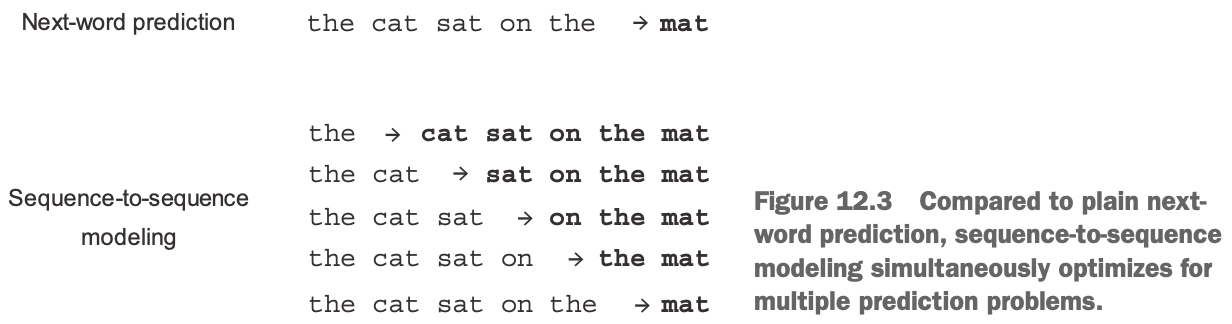

请注意，我们可以在第10章的温度预测问题上使用类似的序列到序列设置：给定120个每小时数据点的序列，学习在未来生成120个温度被24小时抵消的序列。您不仅要解决初始问题，还可以解决24小时内预测温度的119个相关问题，给定1 <= i < 120个之前的每小时数据点。如果您尝试在序列到序列设置中重新训练第10章中的RNN，您会发现您将获得相似但有写更糟糕的结果，因为使用同一模型解决这些额外的119个相关问题与我们实际关心的任务略有困难。

在上一章中，您了解了在一般情况下可用于序列对序列学习的设置：将源序列输入编码器，然后将编码序列和目标序列输入解码器，解码器试图预测同一有一个步长偏移的目标序列。当您进行文本生成，没有源序列：您只是试图预测给定过去tokens来预测目标序列的下一个 token，我们只能使用解码器来做到这一点。多亏了 `causal padding`，解码器只会看单词0...N来预测单词N+1。

让我们实现我们的模型——我们将重用我们在第11章中创建的构建模块： `PositionalEmbedding` 和 `TransformerDecoder`。

In [7]:
from tensorflow.keras import layers
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length 
        self.input_dim = input_dim
        self.output_dim = output_dim
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1) 
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions) 
        return embedded_tokens + embedded_positions
    def compute_mask(self, inputs, mask=None): 
        return tf.math.not_equal(inputs, 0)
    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config
    
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True
    def get_config(self):
        config = super().get_config() 
        config.update({
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "dense_dim": self.dense_dim,
        })
        return config
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
                 [tf.expand_dims(batch_size, -1),
                  tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)
    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                    mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1) 
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)



In [10]:
from tensorflow.keras import layers
embed_dim = 256
latent_dim = 2048
num_heads = 2

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, x)
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop"
)

### 12.1.5 A text-generation callback with variable-temperature sampling

我们将使用 `callback` 在每个 epoch 后使用不同的温度范围生成文本。这允许您查看生成的文本随着模型开始收敛而演变，以及温度对采样策略的影响。我们将使用提示“the movie”：我们将从其开始生成的所有文本。

In [21]:
import numpy as np
tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

class TextGenerator(keras.callbacks.Callback):
    def __init__(self,
                 prompt,
                 generate_length,
                 model_input_length,
                 temperatures=(1., ),
                 print_freq=1):
        self.prompt = prompt
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq
        
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.print_freq != 0:
            return 
        for temperature in self.temperatures:
            print("== Generating with temperature", temperature)
            sentence = self.prompt
            for i in range(self.generate_length):
                tokenized_sentence = text_vectorization([sentence])
                predictions = self.model(tokenized_sentence)
                next_token = sample_next(predictions[0, i, :])
                sampled_token = tokens_index[next_token]
                sentence += " " + sampled_token
            print(sentence)

In [22]:
prompt = "This movie"
text_gen_callback = TextGenerator(
    prompt,
    generate_length=50,
    model_input_length=sequence_length,
    temperatures=(0.2, 0.5, 0.7, 1., 1.5)
)

In [23]:
model.fit(lm_dataset, 
          epochs=200, 
          callbacks=[text_gen_callback])

Epoch 1/200
196/196 [==============================] - 439s 2s/step - loss: 4.8389
== Generating with temperature 0.2
This movie movie is is called not plot saying being this complete movie waste [UNK] forever piece [UNK] of out [UNK] suspense shoot whatever you interest know in nothing the more cast laughable has direction no and direction material direction features writing simply this clean is it amateurish picture entertainment with oh
== Generating with temperature 0.5
This movie film was on [UNK] a my young home [UNK] of came eyes through to a sing group and of still teams sit identities around [UNK] a into woman a maybe healthy we audacious dont girl come of into detect any [UNK] harm john the is error about perfectly [UNK] [UNK]
== Generating with temperature 0.7
This movie movie made is released one based of on these imdb short runner has movies been made awarded of but the on mention dvd the son retread  in firstly is having significantly some better people dramatic win proj

KeyboardInterrupt: 

以下是一些精心挑选的例子，说明我们在200个 epoch的训练后能够产生什么。请注意，标点符号不是我们词汇的一部分，所以我们的生成文本都没有标点符号：

- With `temperature=0.2`
- - “this movie is a [UNK] of the original movie and the first half hour of the movie is pretty good but it is a very good movie it is a good movie for the time period"
- - “this movie is a [UNK] of the movie it is a movie that is so bad that it is a [UNK] movie it is a movie that is so bad that it makes you laugh and cry at the same time it is not a movie i dont think ive ever seen”
- With `temperature=0.5`
- - “this movie is a [UNK] of the best genre movies of all time and it is not a good movie it is the only good thing about this movie i have seen it for the first time and i still remember it being a [UNK] movie i saw a lot of years”
- - “this movie is a waste of time and money i have to say that this movie was a complete waste of time i was surprised to see that the movie was made up of a good movie and the movie was not very good but it was a waste of time and”

如您所见，低温值会导致文本非常无聊和重复，有时会导致生成过程陷入循环。随着更高的温度，生成的文本变得更加有趣、令人惊讶，甚至更具创意。在非常高的温度下，局部结构开始分解，输出看起来基本上是随机的。在这里，良好的温度似乎在0.7左右。总是尝试多种采样策略！学习结构和随机性之间的巧妙平衡使得生成变得有趣。

请注意，通过在更多数据上训练一个更大的模型、更长的模型，您可以获得看起来比这个模型更连贯和现实的生成样本——像GPT-3这样的模型的输出是一个很好的例子，说明了语言模型可以做什么（GPT-3实际上与我们在本示例中训练的模型相同，但具有深堆叠的 Transformer 解码器和更大的训练语料库）。但是，除了通过随机和您自己的解释的魔力外，不要指望生成任何有意义的文本：您所做的只是从统计模型中抽取数据，以哪些单词出现在哪些单词之后。语言模型都是形式，没有实质内容。

自然语言是沟通渠道、对世界采取行动的方式、社会润滑剂、制定、存储和检索自己想法的方式......这些语言的使用是其含义的起源。深度学习的“语言模型”，但实际上没有捕捉到语言的这些基本方面。它无法沟通（它没有什么可沟通的，也没有人可以沟通的），它不能对世界采取行动（它没有代理，也没有意图），它不能是社交的，它没有任何想法。语言是心灵的操作系统，因此，为了使语言有意义，它需要一个头脑来利用它。

语言模型的作用是捕获我们在使用语言生活时生成的可观察的artifacts（书籍、在线电影评论、推文）的统计结构。这些 artifacts 具有统计结构，这一事实是人类如何实现语言的副作用。这里有一个思想实验：如果我们的语言在压缩通信方面做得更好，就像计算机对大多数数字通信所做的那样呢？语言同样有意义，仍然可以实现其许多目的，但它缺乏任何内在的统计结构，因此无法像你刚才那样建模。

### 12.1.6 Wrapping up


- 给定之前的 token，您可以通过训练模型来预测下一个 token 来生成离散序列数据。
- 就文本而言，这样的模型被称为语言模型。它可以基于单词或字符。
- 采样下一个 token 需要在坚持模型可能判断的内容和引入随机性之间取得平衡。
- 处理这个问题的一种方法是 softmax temperature 的概念。总是在不同的温度下进行实验，以找到合适的温度。